In [1]:
import random
import numpy as np
from player import Player
from action import Action
from action_validator import ActionValidator
import config
import matplotlib
import json
from collections import Counter
import pandas as pd


In [ ]:
def display_stats():
    """
    Loads the simulated hands data from the JSON file and generates visualizations:
    1. Number of Hands Won per Player (bar chart using seaborn)
    2. Chip Counts Over Time per Player (line chart using seaborn)
    3. Cumulative Hands Won Over Time (line chart using seaborn)
    4. Card Win Rates (bar chart using seaborn)
    5. Average Big Blinds Won per Hand between Players (bar chart using seaborn)
    
    Additionally, it prints descriptive statistics for:
    - Chip counts over time
    - Net chip change per hand (chips)
    - Average Big Blinds per Hand per player
    """
    import json
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    import pandas as pd

    try:
        with open('../hands.json', 'r') as f:
            hands_data = json.load(f)
        print("Loaded 'hands.json' successfully.")
    except FileNotFoundError:
        print("Error: 'hands.json' not found. Please run the simulation first.")
        return

    win_counts = Counter()
    chip_history = {}  
    card_counter = Counter()
    player_names = set()

    # Process each hand in the simulation
    for hand in hands_data:
        players = hand.get('players', [])
        for player in players:
            name = player['name']
            chips = player['chips']
            player_names.add(name)
            if name not in chip_history:
                chip_history[name] = []
            chip_history[name].append(chips)

        winners = hand.get('winners', [])
        for winner in winners:
            win_counts[winner] += 1
            for player in players:
                if player['name'] == winner:
                    hand_cards = [card['rank'] for card in player['hand']]
                    card_counter.update(hand_cards)
                    break

    chip_df = pd.DataFrame(chip_history)
    chip_df.index.name = 'Hand Number'
    chip_df.reset_index(inplace=True)
    chip_df['Hand Number'] += 1  

    win_counts_df = pd.DataFrame(win_counts.items(), columns=['Player', 'Hands Won'])
    win_counts_df = win_counts_df.sort_values(by='Hands Won', ascending=False)

    cards_df = pd.DataFrame(card_counter.items(), columns=['Card', 'Wins'])
    cards_df = cards_df.sort_values(by='Wins', ascending=False)

    sns.set(style="whitegrid")

    # Graph 1: Number of Hands Won per Player (Bar Chart)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Player', y='Hands Won', data=win_counts_df, palette='viridis')
    plt.title('Number of Hands Won per Player')
    plt.xlabel('Player')
    plt.ylabel('Hands Won')
    plt.tight_layout()
    plt.show()

    # Graph 2: Chip Counts Over Time per Player (Line Chart)
    chip_df_melted = chip_df.melt(id_vars=['Hand Number'], var_name='Player', value_name='Chips')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Hand Number', y='Chips', hue='Player', data=chip_df_melted)
    plt.title('Chip Counts Over Time')
    plt.xlabel('Hand Number')
    plt.ylabel('Chips')
    plt.legend(title='Player')
    plt.tight_layout()
    plt.show()

    # Graph 3: Cumulative Hands Won Over Time (Line Chart)
    cumulative_wins = {player: [] for player in player_names}
    wins_running = {player: 0 for player in player_names}
    hand_numbers = range(1, len(hands_data) + 1)
    
    for hand in hands_data:
        winners = hand.get('winners', [])
        for player in player_names:
            if player in winners:
                wins_running[player] += 1
            cumulative_wins[player].append(wins_running[player])
    
    cumulative_wins_df = pd.DataFrame(cumulative_wins, index=hand_numbers)
    cumulative_wins_df.index.name = 'Hand Number'
    cumulative_wins_reset = cumulative_wins_df.reset_index().melt(id_vars=['Hand Number'], 
                                                                  var_name='Player', 
                                                                  value_name='Cumulative Wins')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Hand Number', y='Cumulative Wins', hue='Player', data=cumulative_wins_reset)
    plt.title('Cumulative Hands Won Over Time')
    plt.xlabel('Hand Number')
    plt.ylabel('Cumulative Wins')
    plt.legend(title='Player')
    plt.tight_layout()
    plt.show()

    # Graph 4: Card Win Rates (Bar Chart)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Card', y='Wins', data=cards_df, palette='coolwarm')
    plt.title('Card Ranks in Winning Hands')
    plt.xlabel('Card Rank')
    plt.ylabel('Number of Wins')
    plt.tight_layout()
    plt.show()

    # Graph 5: Average Big Blinds (bbs) Won per Hand between Players
    big_blind = 10  # Use the big blind value from your TexasHoldem game configuration
    chip_df_for_diff = chip_df.copy()
    chip_df_for_diff.set_index('Hand Number', inplace=True)
    chip_diff = chip_df_for_diff.diff().dropna()  
    avg_chip_gain = chip_diff.mean()  
    avg_bbs = avg_chip_gain / big_blind  
    avg_bbs_df = pd.DataFrame({'Player': avg_bbs.index, 'Avg BBS per Hand': avg_bbs.values})
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Player', y='Avg BBS per Hand', data=avg_bbs_df, palette='plasma')
    plt.title('Average Big Blinds Won per Hand')
    plt.xlabel('Player')
    plt.ylabel('Avg BBS per Hand')
    plt.tight_layout()
    plt.show()

    print("Descriptive Statistics for Chip Counts Over Time:")
    print(chip_df.describe())
    
    print("\nDescriptive Statistics for Net Chip Change per Hand (in chips):")
    print(chip_diff.describe())
    
    print("\nAverage Big Blinds Won per Hand (for each player):")
    print(avg_bbs_df)
    
    print("\nVisualizations and descriptive statistics generated successfully.")


Loaded 'hands.json' successfully.


C:\Users\felulind\AppData\Local\Temp\ipykernel_29648\311081484.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Hands Won', data=win_counts_df, palette='viridis')


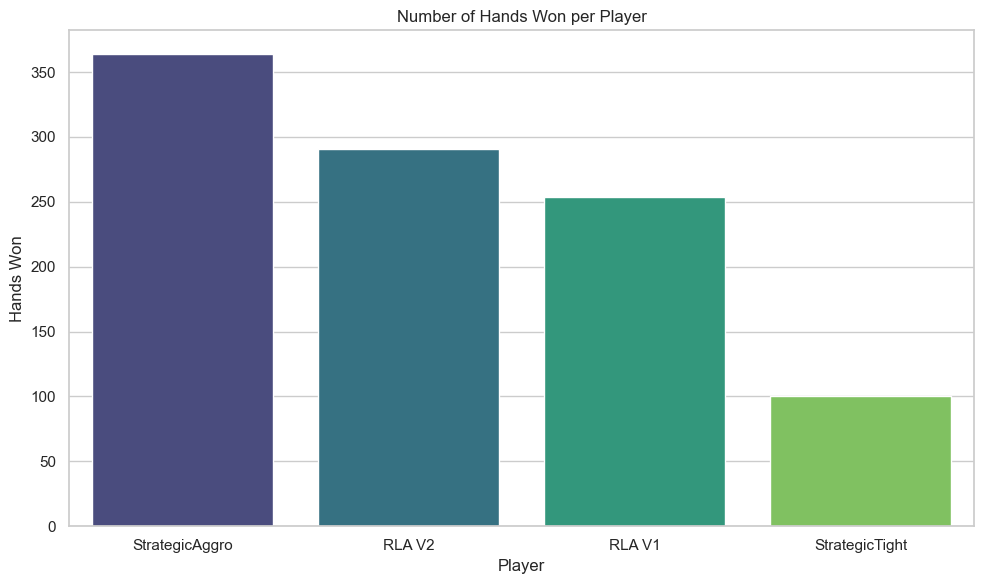

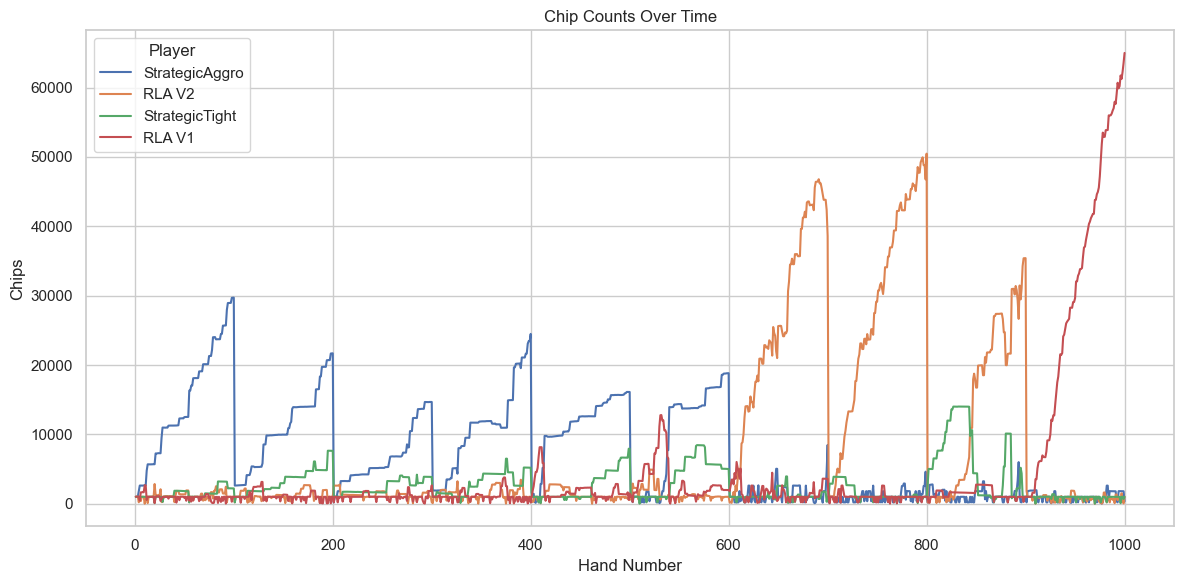

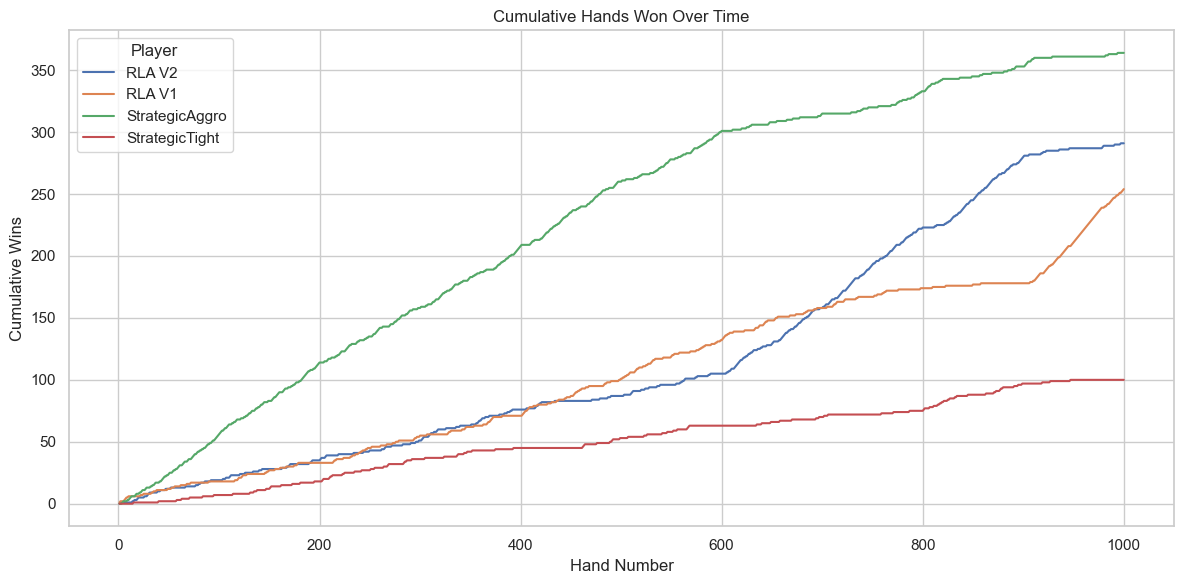

C:\Users\felulind\AppData\Local\Temp\ipykernel_29648\311081484.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Card', y='Wins', data=cards_df, palette='coolwarm')


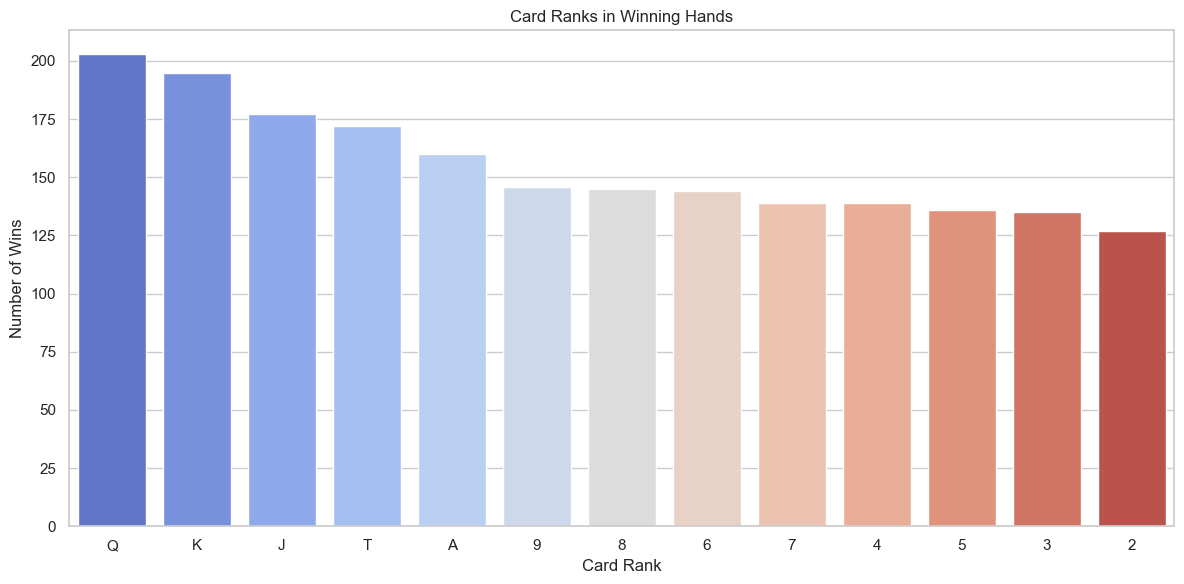

C:\Users\felulind\AppData\Local\Temp\ipykernel_29648\311081484.py:137: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='Avg BBS per Hand', data=avg_bbs_df, palette='plasma')


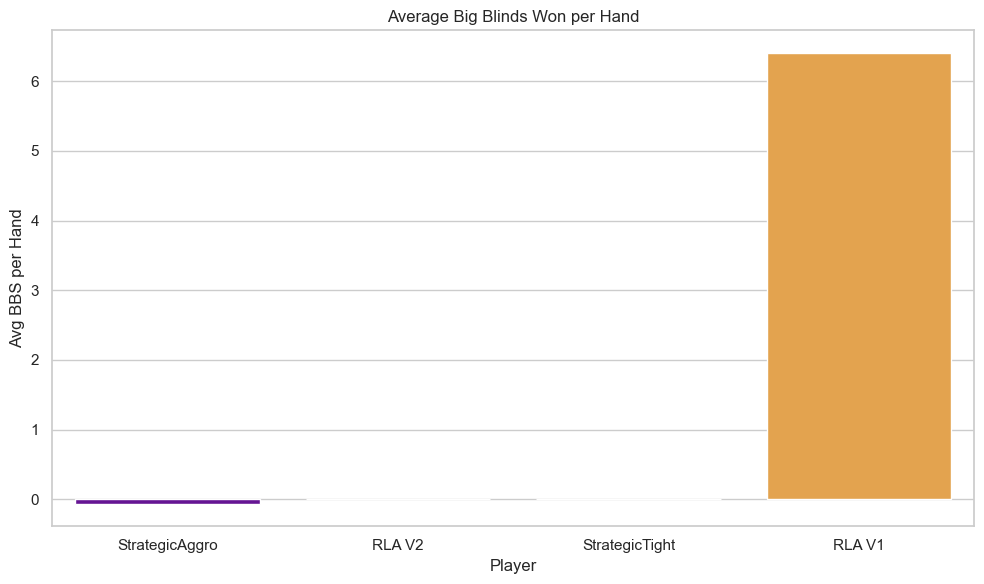

Descriptive Statistics for Chip Counts Over Time:
       Hand Number  StrategicAggro        RLA V2  StrategicTight        RLA V1
count  1000.000000     1000.000000   1000.000000     1000.000000   1000.000000
mean    500.500000     6907.097856   7749.860477     2641.773753   4412.885046
std     288.819436     6919.421204  12959.439641     2626.250684  10918.197006
min       1.000000       17.600000      0.000000        3.608964      5.211072
25%     250.750000     1000.000000    990.000000     1000.000000    990.000000
50%     500.500000     3664.353482   1248.409588     1471.558153   1010.000000
75%     750.250000    12323.249451   3744.879095     3843.807137   1975.785790
max    1000.000000    29716.966652  50475.802099    14025.870057  64999.570069

Descriptive Statistics for Net Chip Change per Hand (in chips):
       StrategicAggro        RLA V2  StrategicTight       RLA V1
count      999.000000  9.990000e+02      999.000000   999.000000
mean        -0.634835  3.641620e-15       -0

In [21]:
display_stats()

In [18]:
def display_interesting_hands(player_filter=None, top_n=5):
    """
    Loads the simulated hands data from the JSON file, identifies hands where the winners had a significant chip swing,
    and presents a detailed summary of the top N interesting hands. The summary includes:
      - Hand Number
      - Winner
      - Chip Gain (in chips and Big Blinds)
      - Winning Cards
      - Win Method (with an adjustment: if labeled "Showdown" but fewer than 5 community cards, it's re-labeled as "Fold/Incomplete Showdown")
      - Community Cards
      - Opponents (name and hand)

    Parameters:
      player_filter (str, optional): If provided, only hands where the winner's name matches this value will be considered.
      top_n (int): The number of top interesting hands to display.

    Note: The JSON file is assumed to be located one directory level up ("../hands.json"). Adjust as necessary.
    """
    import json
    import pandas as pd

    # Load the hands data from the JSON file.
    try:
        with open('../hands.json', 'r') as f:
            hands_data = json.load(f)
        print("Loaded 'hands.json' successfully.")
    except FileNotFoundError:
        print("Error: 'hands.json' not found. Please run the simulation first.")
        return

    big_blind = 10  # Big blind value (adjust if needed)
    interesting_records = []

    # Loop over hands starting at index 1 (since we need a previous hand for chip comparisons)
    for hand_index in range(1, len(hands_data)):
        current_hand = hands_data[hand_index]
        previous_hand = hands_data[hand_index - 1]
        winners = current_hand.get('winners', [])
        
        # Retrieve and format community cards.
        community_cards = current_hand.get('community_cards', [])
        community_cards_str = (
            ", ".join([f"{card.get('rank')} of {card.get('suit')}" for card in community_cards])
            if community_cards else "N/A"
        )
        
        # Process each player in the current hand.
        for player in current_hand.get('players', []):
            name = player.get('name')
            # If a filter is provided and this player's name does not match, skip.
            if player_filter is not None and name != player_filter:
                continue

            if name in winners:
                current_chips = player.get('chips', 0)
                
                # Get the player's chips from the previous hand.
                prev_chips = None
                for prev_player in previous_hand.get('players', []):
                    if prev_player.get('name') == name:
                        prev_chips = prev_player.get('chips', 0)
                        break
                
                if prev_chips is None:
                    continue  # Skip if previous chips not found.
                
                chip_gain = current_chips - prev_chips
                # Consider only positive chip gains as interesting.
                if chip_gain <= 0:
                    continue

                # Format the winning cards.
                cards = player.get('hand', [])
                winning_cards_str = (
                    ", ".join([f"{card.get('rank')} of {card.get('suit')}" for card in cards])
                    if cards else "N/A"
                )
                
                # Determine win method (default to "Showdown" if not provided).
                win_method = player.get('win_method', 'Showdown')
                # Adjust win method: if it's "Showdown" but there are fewer than 5 community cards,
                # label it as "Fold/Incomplete Showdown" since a full showdown is impossible.
                if win_method.lower() == "showdown" and len(community_cards) < 5:
                    win_method = "Fold/Incomplete Showdown"
                
                # Gather opponents' details (all players in the current hand who are not the winner).
                opponents_info = []
                for opp in current_hand.get('players', []):
                    if opp.get('name') == name:
                        continue
                    opp_cards = opp.get('hand', [])
                    opp_cards_str = (
                        ", ".join([f"{card.get('rank')} of {card.get('suit')}" for card in opp_cards])
                        if opp_cards else "N/A"
                    )
                    opponents_info.append(f"{opp.get('name')} (hand: {opp_cards_str})")
                opponents_str = "; ".join(opponents_info) if opponents_info else "N/A"
                
                record = {
                    'Hand Number': hand_index + 1,  # Convert 0-index to 1-index.
                    'Winner': name,
                    'Chip Gain': chip_gain,
                    'Chip Gain (Big Blinds)': round(chip_gain / big_blind, 2),
                    'Winning Cards': winning_cards_str,
                    'Win Method': win_method,
                    'Community Cards': community_cards_str,
                    'Opponents': opponents_str
                }
                interesting_records.append(record)

    # Sort the records by chip gain (largest first).
    interesting_records_sorted = sorted(interesting_records, key=lambda r: r['Chip Gain'], reverse=True)
    top_hands = interesting_records_sorted[:top_n]

    if not top_hands:
        print("No interesting hands found based on the chip swing criteria and filter.")
        return

    # Create a DataFrame for a neat tabular display.
    df_top_hands = pd.DataFrame(top_hands)
    if player_filter:
        header = f"\nTop {top_n} Interesting Hands for Player '{player_filter}':"
    else:
        header = f"\nTop {top_n} Interesting Hands (All Players):"
    print(header)
    print(df_top_hands.to_string(index=False))
    
    # Print detailed summary for each hand.
    print("\nDetailed Summary of Top Big Hands:")
    for rec in top_hands:
        print("\n--------------------------------------")
        print(f"Hand Number      : {rec['Hand Number']}")
        print(f"Winner           : {rec['Winner']}")
        print(f"Chip Gain        : {rec['Chip Gain']} chips ({rec['Chip Gain (Big Blinds)']} Big Blinds)")
        print(f"Winning Cards    : {rec['Winning Cards']}")
        print(f"Win Method       : {rec['Win Method']}")
        print(f"Community Cards  : {rec['Community Cards']}")
        print(f"Opponents        : {rec['Opponents']}")
    print("\nAnalysis of interesting/big hands complete.")


In [20]:
display_interesting_hands(player_filter='rla')

Loaded 'hands.json' successfully.
No interesting hands found based on the chip swing criteria and filter.
